# Future Sales Prediction of a Store by Time-Series Forecasting

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [1]:
#Initialising the dateperse format to Convert the string to datetime object
dateparse = lambda x: pd.datetime.strptime(x, '%d-%m-%Y')

In [10]:
df1 = pd.read_csv('StoreData.csv',parse_dates=[1],date_parser=dateparse)
df1

C:\Users\Supriyo\AppData\Local\Temp\ipykernel_2724\369464147.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dateparse = lambda x: pd.datetime.strptime(x, '%d-%m-%Y')


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
137,1,2012-09-21,1506126.06,0,69.87,3.721,222.781839,6.908
138,1,2012-09-28,1437059.26,0,76.08,3.666,222.981658,6.908
139,1,2012-10-05,1670785.97,0,68.55,3.617,223.181477,6.573
140,1,2012-10-12,1573072.81,0,62.99,3.601,223.381296,6.573


In [11]:
#df1['date']=pd.to_datetime({'year':df1['Year'],'month':df1['Month'],'day':df1['Day']})
df1['Date'].freq='W'

In [12]:
df1['Date'].freq

'W'

In [13]:
# Taking Only the necessary variables from the data to train the model
df2=df1[['Date','Weekly_Sales','Holiday_Flag','Temperature','Fuel_Price','CPI','Unemployment']]

In [14]:
#Setting index of the dataframe as datetime
df2.index=df2['Date']

In [15]:
#It will require while testing our model with the predicted values. You will understand it later
pretest=df2[120:]

In [16]:
# As the feature values are too large, it can overfit the model. So to generalize the input data, and reduce the complexity of the model, the steps are done
df2['Weekly_Sales']=df2['Weekly_Sales']/1000
df2['Fuel_Price']=df2['Fuel_Price']*10
df2['Unemployment']=df2['Unemployment']*10

C:\Users\Supriyo\AppData\Local\Temp\ipykernel_2724\3631162637.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Weekly_Sales']=df2['Weekly_Sales']/1000
C:\Users\Supriyo\AppData\Local\Temp\ipykernel_2724\3631162637.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Fuel_Price']=df2['Fuel_Price']*10
C:\Users\Supriyo\AppData\Local\Temp\ipykernel_2724\3631162637.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

In [17]:
#Converting the float values to integers, to train the model accordingly
df2[['Weekly_Sales','Temperature','Fuel_Price','CPI','Unemployment']] = df2[['Weekly_Sales','Temperature','Fuel_Price','CPI','Unemployment']].astype('int')

C:\Users\Supriyo\AppData\Local\Temp\ipykernel_2724\1107023909.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[['Weekly_Sales','Temperature','Fuel_Price','CPI','Unemployment']] = df2[['Weekly_Sales','Temperature','Fuel_Price','CPI','Unemployment']].astype('int')


In [18]:
df2

,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2010-02-05,2010-02-05,1643,0,42,25,211,81
2010-02-12,2010-02-12,1641,1,38,25,211,81
2010-02-19,2010-02-19,1611,0,39,25,211,81
2010-02-26,2010-02-26,1409,0,46,25,211,81
2010-03-05,2010-03-05,1554,0,46,26,211,81
...,...,...,...,...,...,...,...
2012-09-21,2012-09-21,1506,0,69,37,222,69
2012-09-28,2012-09-28,1437,0,76,36,222,69
2012-10-05,2012-10-05,1670,0,68,36,223,65


In [19]:
# Checking if there's any null values in the dataset
df2.isnull().any()

Date            False
Weekly_Sales    False
Holiday_Flag    False
Temperature     False
Fuel_Price      False
CPI             False
Unemployment    False
dtype: bool

<Axes: xlabel='Date'>

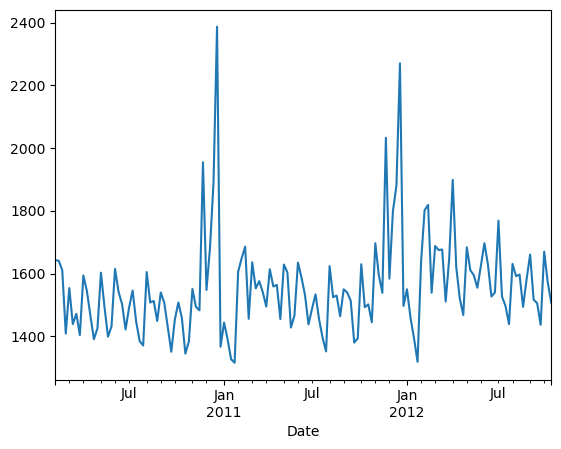

In [20]:
#Plot the target variable i.e. Weekly Sales values 
df2['Weekly_Sales'].plot()

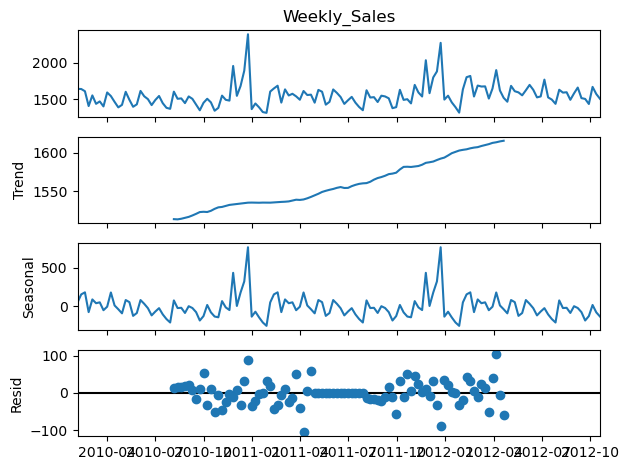

In [21]:
# Using seasonal decompose to see if there's any trend, seasonality, trend in residuals, and to understand the dataset
from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(df2['Weekly_Sales'],model='add')
result.plot();

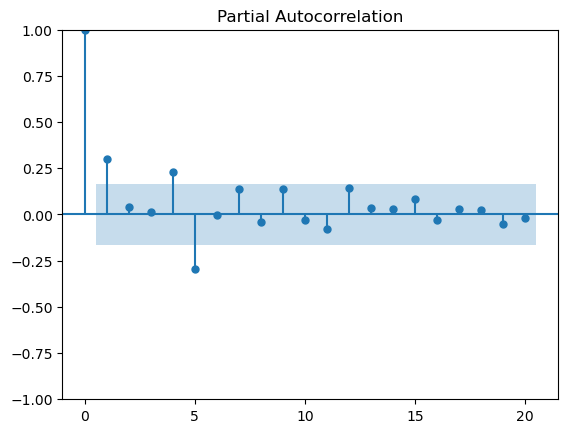

In [22]:
#Plotting PACF graph to cross check
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df2['Weekly_Sales'], lags=20);

In [23]:
from pmdarima import auto_arima
from statsmodels.tsa.arima_model import ARIMA,ARIMAResults
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [24]:
# Checking for the possible values of (p,d,q) and (P,D,Q,m)
#Putting the value of m=12, because it's clear from the previous graphs that there's a seasonality in a year frequency i.e. after 52 weeks
auto_arima(df2['Weekly_Sales'],seasonal=True,m=52).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  142
Model:             SARIMAX(3, 1, 0)x(1, 0, [1], 52)   Log Likelihood                -841.097
Date:                              Sun, 13 Aug 2023   AIC                           1694.194
Time:                                      13:46:57   BIC                           1711.887
Sample:                                  02-05-2010   HQIC                          1701.384
                                       - 10-19-2012                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6630      0.058    -11.514      0.000      -0.776      -0.550
ar.L2         -0.5245      0.057     -9.176      0.000      -0.636      -0.412
ar.L3         -0.3425      0.057     -6.040      0.000      -0.454      -0.231
ar.S.L52       0.9824      0.030     32.631      0.000       0.923       1.041
ma.S.L52      -0.5020      0.374     -1.342      0.180      -1.235       0.231
sigma2      3868.3247    954.528      4.053      0.000    1997.485    5739.165
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                17.09
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               1.43   Skew:                             0.20
Prob(H) (two-sided):                  0.22   Kurtosis:                         4.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [25]:
len(df2)

142

In [26]:
#Taking 120 datavalues among 142 datapoints to train the model
train=df2.iloc[:120]
train

,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2010-02-05,2010-02-05,1643,0,42,25,211,81
2010-02-12,2010-02-12,1641,1,38,25,211,81
2010-02-19,2010-02-19,1611,0,39,25,211,81
2010-02-26,2010-02-26,1409,0,46,25,211,81
2010-03-05,2010-03-05,1554,0,46,26,211,81
...,...,...,...,...,...,...,...
2012-04-20,2012-04-20,1521,0,66,38,221,71
2012-04-27,2012-04-27,1468,0,67,38,221,71
2012-05-04,2012-05-04,1684,0,75,37,221,71


In [27]:
# Taking the rest 12 datapoints for testing the model
test=df2.iloc[120:]
test

,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2012-05-25,2012-05-25,1555,0,77,35,221,71
2012-06-01,2012-06-01,1624,0,77,35,221,71
2012-06-08,2012-06-08,1697,0,78,34,221,71
2012-06-15,2012-06-15,1630,0,79,33,221,71
2012-06-22,2012-06-22,1527,0,78,33,221,71
2012-06-29,2012-06-29,1540,0,84,32,221,71
2012-07-06,2012-07-06,1769,0,81,32,221,69
2012-07-13,2012-07-13,1527,0,77,32,221,69
2012-07-20,2012-07-20,1497,0,80,33,221,69


In [28]:
# These are the exogenous features that we will use to train our SARIMAX model
features = ['Holiday_Flag','Temperature','Fuel_Price','CPI','Unemployment']

In [29]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [30]:
# Training the model using the calculated parameters and with the exogenous features
model=SARIMAX(endog=train['Weekly_Sales'],exog=train[features],order=(3,1,0),seasonal_order=(1, 0, 1, 52))

C:\Users\Supriyo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\Supriyo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


In [31]:
#Fitting the model
result=model.fit()

C:\Users\Supriyo\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Supriyo\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [32]:
#Summary of our fitted model
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                         Weekly_Sales   No. Observations:                  120
Model:             SARIMAX(3, 1, 0)x(1, 0, [1], 52)   Log Likelihood                -720.011
Date:                              Sun, 13 Aug 2023   AIC                           1462.022
Time:                                      13:48:52   BIC                           1492.593
Sample:                                  02-05-2010   HQIC                          1474.436
                                       - 05-18-2012                                         
Covariance Type:                                opg                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Holiday_Flag    28.2366     46.737      0.604      0.546     -63.366     119.839
Temperature      0.7713      1.280      0.603      0.547      -1.738       3.280
Fuel_Price      -0.1565      7.507     -0.021      0.983     -14.870      14.557
CPI              2.8886     13.401      0.216      0.829     -23.377      29.154
Unemployment    -9.6949     13.629     -0.711      0.477     -36.407      17.018
ar.L1           -0.5863      0.067     -8.773      0.000      -0.717      -0.455
ar.L2           -0.4778      0.069     -6.972      0.000      -0.612      -0.343
ar.L3           -0.3323      0.065     -5.111      0.000      -0.460      -0.205
ar.S.L52         0.9912      0.034     28.929      0.000       0.924       1.058
ma.S.L52        -0.6386      0.623     -1.025      0.305      -1.859       0.582
sigma2        3503.1349   1688.834      2.074      0.038     193.081    6813.189
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                18.97
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               6.69   Skew:                             0.10
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='Date'>

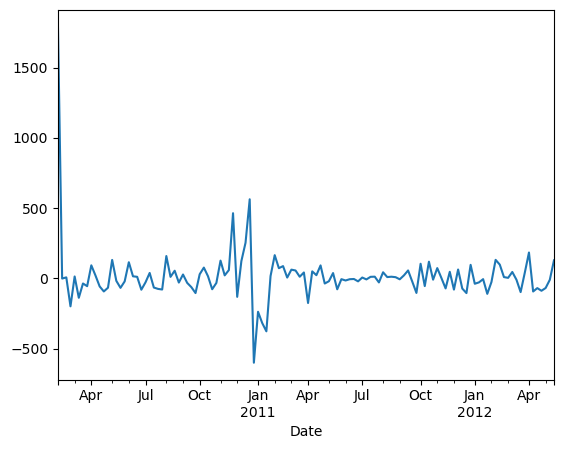

In [33]:
# Residuals Plot
# AS seen, the residuals are in linear mannered, these residuals can again be trained to fit with the predicted values for-
# -getting better accuracy of the predictions. But this is beyond of our considerations in this model.
residuals = result.resid
residuals.plot()

In [34]:
# Predicting the results and plotting it with original values
yhat=result.predict()

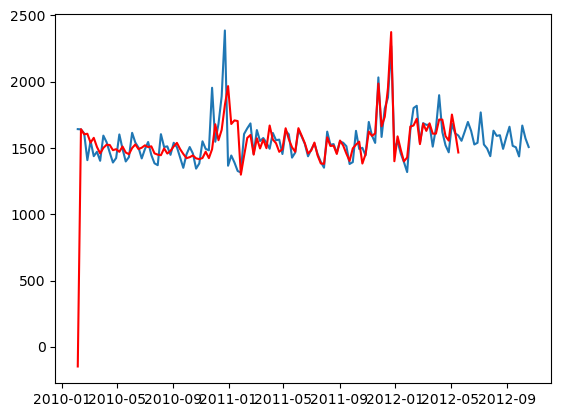

In [35]:
plt.plot(df2['Weekly_Sales'])
plt.plot(yhat, color='red')

In [36]:
# Starting index and ending index for predicting the future Sales
start=len(train)
end=len(train)+len(test)-1

In [37]:
# Predicting Future Sales with our test dataset
# Here we multiplied the prediction with 1000 to get the actual values, cause while training the model we had divided it with 1000 
predictions=(result.predict(start,end,exog=test[features],typ='levels'))*1000

C:\Users\Supriyo\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [38]:
predictions

2012-05-25    1.550428e+06
2012-06-01    1.706015e+06
2012-06-08    1.654239e+06
2012-06-15    1.635927e+06
2012-06-22    1.535711e+06
2012-06-29    1.602798e+06
2012-07-06    1.668157e+06
2012-07-13    1.586655e+06
2012-07-20    1.529453e+06
2012-07-27    1.500154e+06
2012-08-03    1.741600e+06
2012-08-10    1.649809e+06
2012-08-17    1.656679e+06
2012-08-24    1.589764e+06
2012-08-31    1.677208e+06
2012-09-07    1.667289e+06
2012-09-14    1.608247e+06
2012-09-21    1.502732e+06
2012-09-28    1.564798e+06
2012-10-05    1.747013e+06
2012-10-12    1.647963e+06
2012-10-19    1.610191e+06
Freq: W-FRI, Name: predicted_mean, dtype: float64

<Axes: xlabel='Date'>

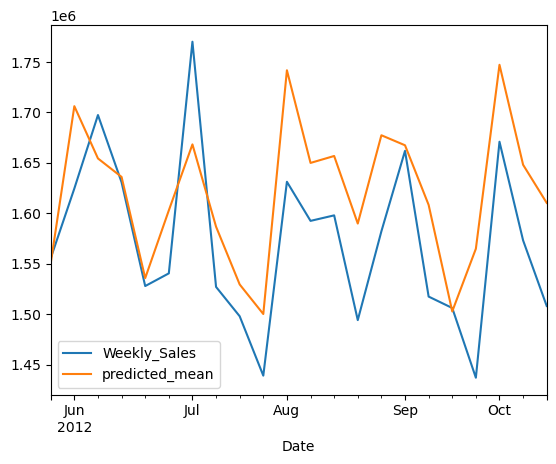

In [39]:
# Here pretest is the actual test values (Cause we have changed our dataset)
pretest['Weekly_Sales'].plot(legend=True)
predictions.plot(legend=True)

In [40]:
from statsmodels.tools.eval_measures import rmse

In [41]:
#Error calculation
error=rmse(pretest['Weekly_Sales'],predictions)
error
# Gives Only 4% error

72213.77608202075

In [42]:
meanx=pretest['Weekly_Sales'].mean()
meanx

1571904.669090909

In [43]:
# Percentage error calculations
perct=(error/meanx)*100
perct

4.594030255268894

In [44]:
# Uncertainity in the predictions-Mean prediction and 95% Confidence interval prediction
predictions_bootstrap = []
for _ in range(100):
    features_bootstrap = {}
    for feature, value in test[features].items():
        features_bootstrap[feature] = train[features].sample(1).iloc[0]
    predictions_bootstrap.append(result.predict(n_periods=1, exog=features_bootstrap)*1000)

predictions_mean = np.mean(predictions_bootstrap)
predictions_conf_int = np.percentile(predictions_bootstrap, [2.5, 97.5])

In [45]:
print('Mean prediction:', predictions_mean)
print('95% confidence interval:', predictions_conf_int)

Mean prediction: 1538982.0988766607
95% confidence interval: [1383276.34895363 1953877.31953616]
